In [1]:
import numpy as np
import healpy as hp
import lsst.sims.utils as utils
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
nside = 128
ra,dec = utils.hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))

In [3]:
# advance things by 3 seconds
mjd1 = 59862
mjd2 = mjd1 + 34./3600./24.

In [4]:
obs = utils.ObservationMetaData(mjd=mjd1)
alt1, az1, PA1 = utils.altAzPaFromRaDec(ra, dec, obs)
obs = utils.ObservationMetaData(mjd=mjd2)
alt2, az2, PA2 = utils.altAzPaFromRaDec(ra, dec, obs)

In [5]:
# If I keep rotSkyPos at zero, then rotTelPos should always equal the parallactic angle.
delta_rot_tel_Pos = PA2-PA1

delta_rot_tel_Pos[np.where(alt1 < 25.)] = hp.UNSEEN
delta_rot_tel_Pos[np.where(alt1 > 85.)] = hp.UNSEEN


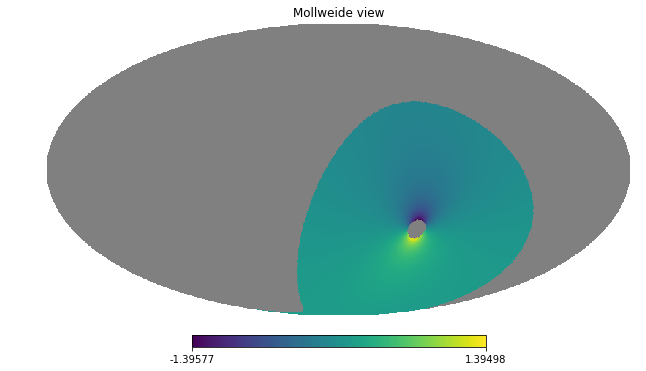

In [6]:
hp.mollview(delta_rot_tel_Pos)

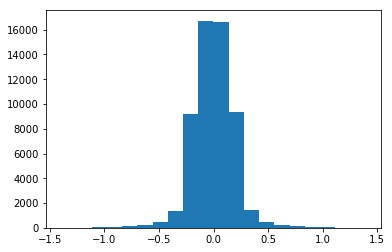

In [9]:
good = np.where(delta_rot_tel_Pos != hp.UNSEEN)
ack = plt.hist(delta_rot_tel_Pos[good], bins=20)

array([ -1.63750000e+30])